In [1]:
import numpy as np
from utils import *
# from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

# from sklearn.linear_model import LinearRegression, Ridge

### Load and split data

In [2]:
X_train, y_train = np.loadtxt('../data/train.dat', usecols=(0,1), unpack=True)
X_test, y_test = np.loadtxt('../data/test.dat', usecols=(0,1), unpack=True)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# print(X_train[:5], y_train[:5], sep='\n\n')

### Perform 6-fold cross validation on linear regressor for each degree d in [0,12]

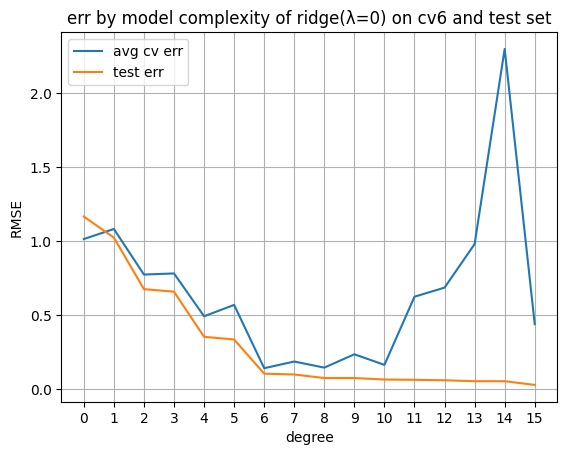

In [6]:
k = 6
max_d = 15

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
for d in degree:
    model = Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=d),
        StandardScaler(),
        RidgeRegressor(λ=0)
    )
    
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    test_err.append(model.score(X_train, y_train))

plt.plot(degree, cv_err, label='avg cv err')
plt.plot(degree, test_err, label='test err')
plt.legend()
plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title('err by model complexity of ridge(λ=0) on cv6 and test set')
plt.grid()
plt.show()

# TEST

In [4]:
# investigation station

d = 11 # 11 gets all fucky wucky like
model = Pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=d),
    StandardScaler(),
    RidgeRegressor(λ=0)
)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

# model.fit(X_test, y_test)
print(model.score(X_test, y_test))

0.06384933783394477
0.08396195740445703
